Linear Regression Assignment - Comprehensive Study
Student Name: YATHARTH PATHAK

Roll No: CSJMA23001390169

Student Name: AMAN DUBEY

Roll No: CSJMA23001390072

Group/Class: B.TECH CSE-AI 3RD YEAR

Date: February 2026

Topic: Predicting house prices (using the California Housing dataset).

Dataset: California Housing (built-in from sklearn)

Objective: Implement Simple, Multiple, Polynomial, Ridge and Lasso Regression

Dataset loaded. Shape: (20640, 9)

Summary Statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.

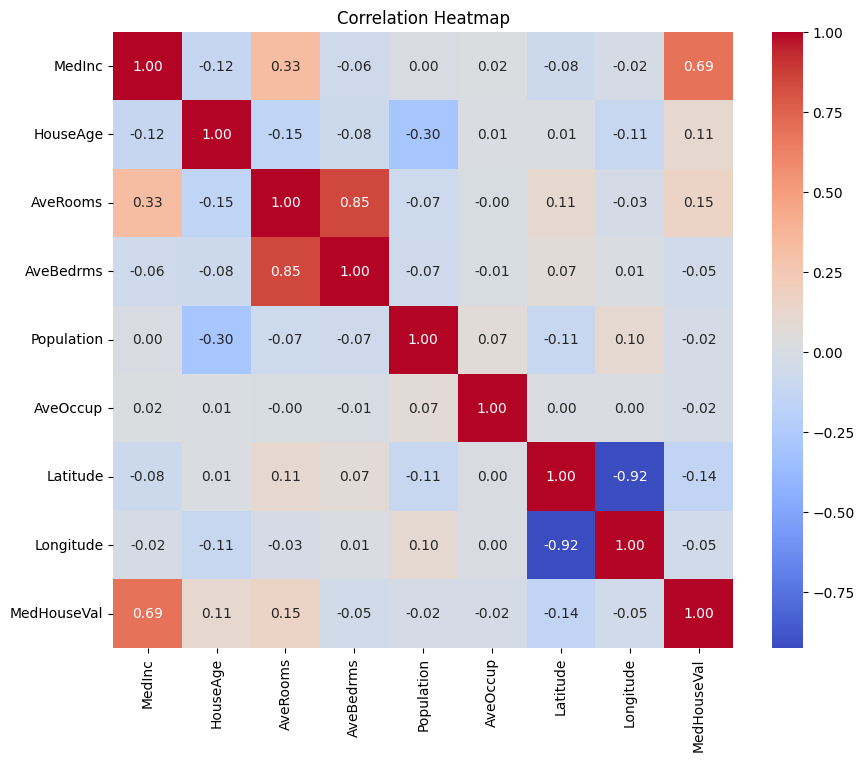

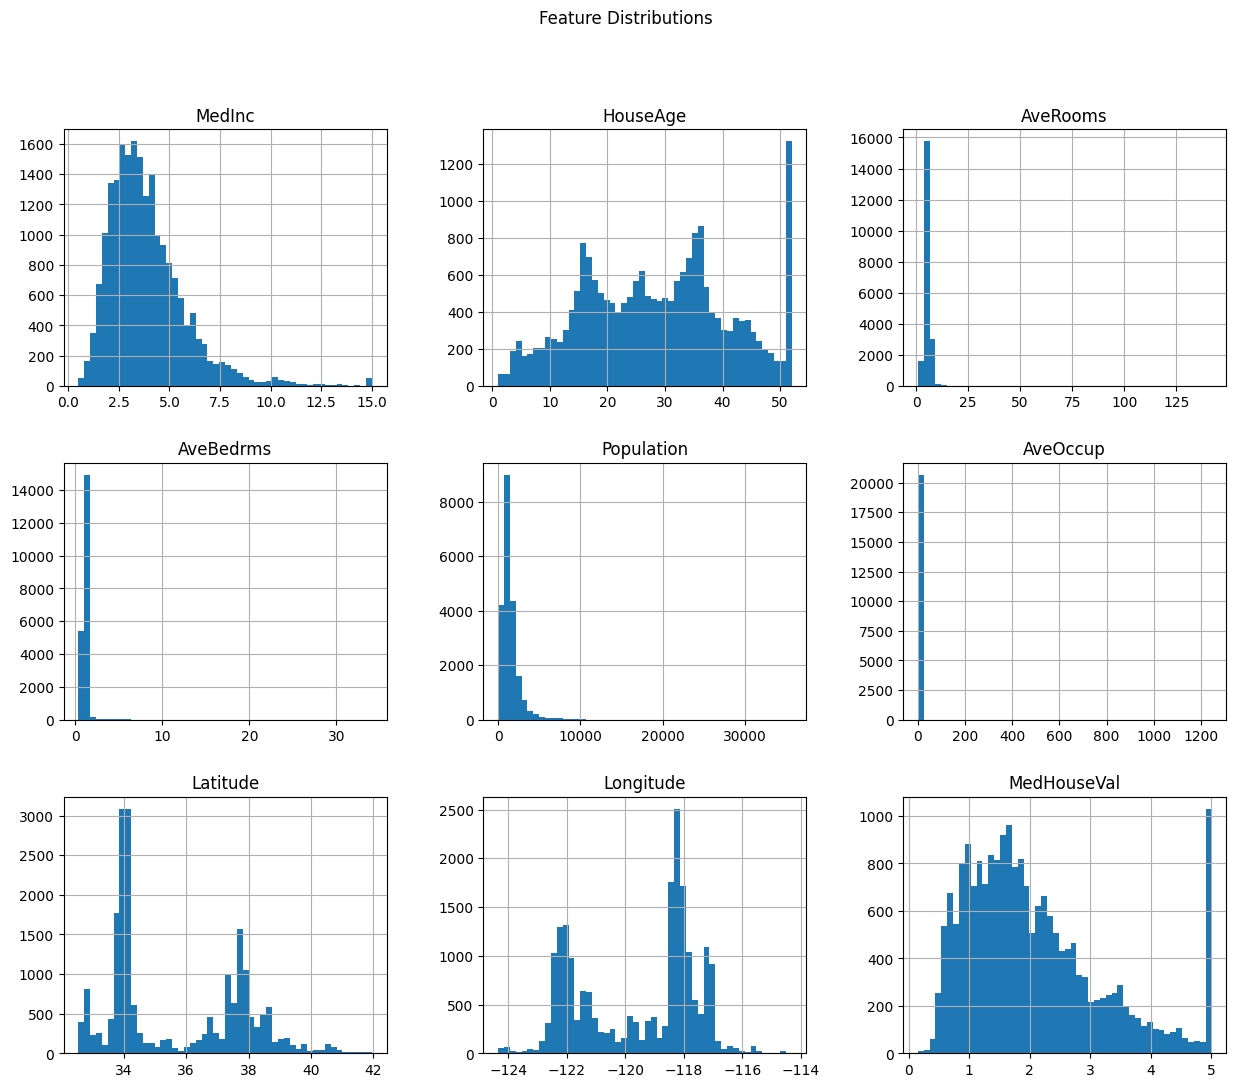

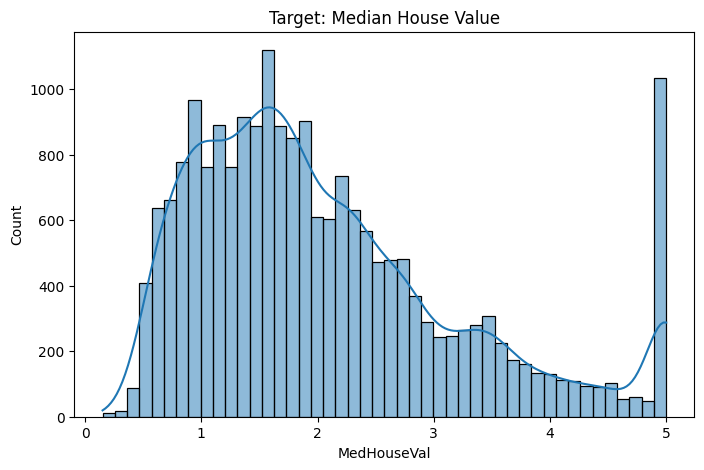


=== Simple Linear Regression (MedInc) ===
Slope (MedInc): 0.4192
Intercept: 0.4453
R²: 0.4643
RMSE: 0.8491


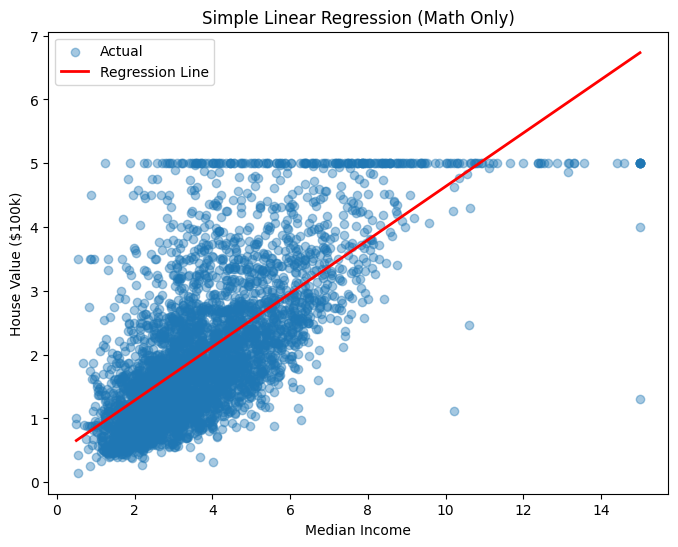


=== Multiple Linear Regression (Closed Form) ===
R²: 0.5875
RMSE: 0.7451
      Feature  Coefficient
4   AveBedrms     0.661341
1      MedInc     0.444781
2    HouseAge     0.009401
5  Population    -0.000008
6    AveOccup    -0.004139
3    AveRooms    -0.120494
7    Latitude    -0.414768
8   Longitude    -0.427852
0        Bias   -36.350578

=== Polynomial Regression (degree=2 on MedInc) ===
R²: 0.4694
RMSE: 0.8451


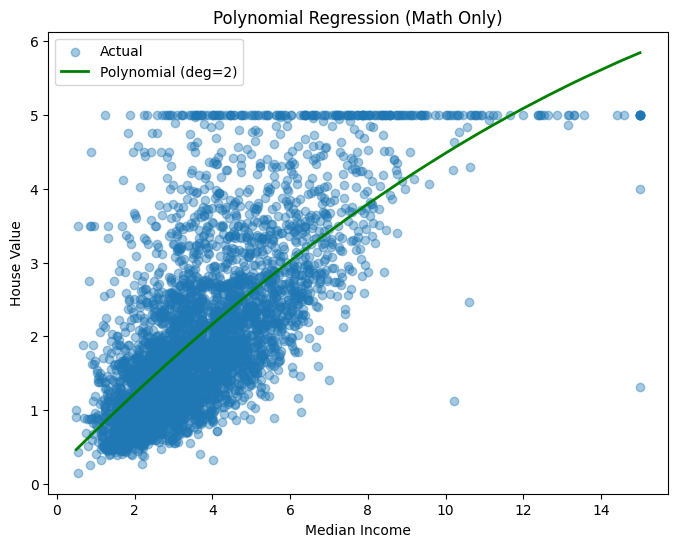

/tmp/ipython-input-1185252476.py:192: RuntimeWarning: overflow encountered in matmul
  gradients = (2/m) * X.T @ (X @ theta - y) + 2 * alpha * theta
/tmp/ipython-input-1185252476.py:193: RuntimeWarning: overflow encountered in matmul
  gradients[0] = (2/m) * X.T[0] @ (X @ theta - y)  # no penalty on bias
/tmp/ipython-input-1185252476.py:194: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradients
/tmp/ipython-input-1185252476.py:206: RuntimeWarning: overflow encountered in matmul
  gradients = (2/m) * X.T @ (X @ theta - y)
/tmp/ipython-input-1185252476.py:208: RuntimeWarning: overflow encountered in matmul
  gradients[0] = (2/m) * X.T[0] @ (X @ theta - y)  # no penalty on bias
/tmp/ipython-input-1185252476.py:209: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradients



=== Ridge Regression (Gradient Descent) ===
R²: nan
RMSE: nan

=== Lasso Regression (Gradient Descent) ===
R²: nan
RMSE: nan


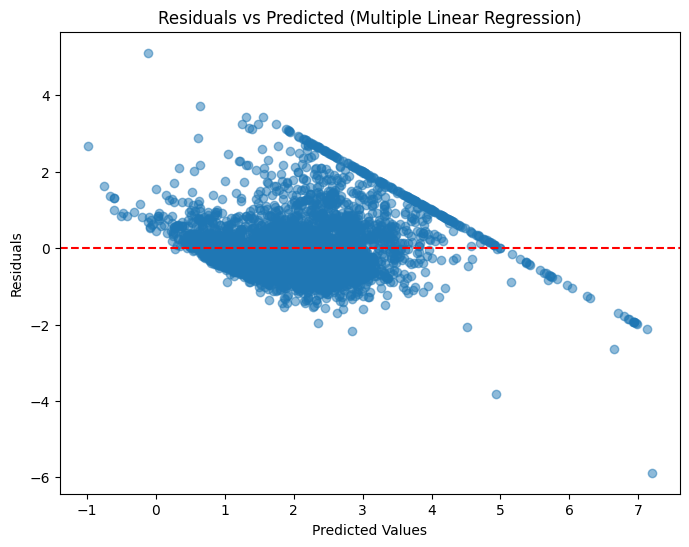

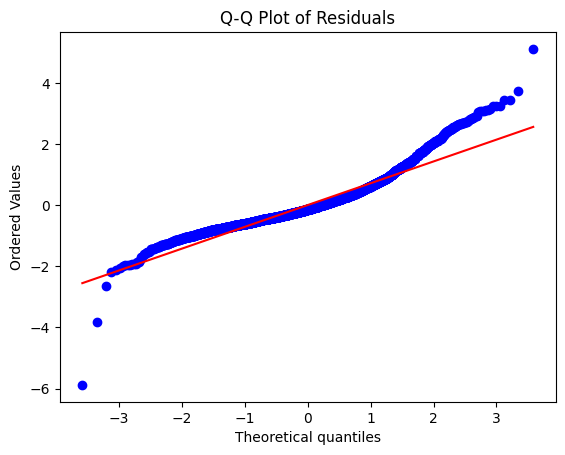


=== Model Comparison ===
                     Model      R²    RMSE
0                Simple LR  0.4643  0.8491
1  Multiple LR (Normal Eq)  0.5875  0.7451
2       Polynomial (deg=2)  0.4694  0.8451
3               Ridge (GD)     NaN     NaN
4               Lasso (GD)     NaN     NaN


In [1]:
# Linear Regression Assignment

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load California Housing Dataset

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
df = housing.frame
print("Dataset loaded. Shape:", df.shape)

# Part A: Exploratory Data Analysis (EDA)

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Feature Distributions
df.hist(bins=50, figsize=(15, 12))
plt.suptitle('Feature Distributions')
plt.show()

# Target Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['MedHouseVal'], kde=True)
plt.title('Target: Median House Value')
plt.show()

# Helper Functions (Pure Math)

def add_bias(X):
    """Add bias term (column of ones)"""
    return np.c_[np.ones(X.shape[0]), X]

def normal_equation(X, y):
    """Closed-form solution: θ = (X^T X)^(-1) X^T y"""
    XtX = X.T @ X
    XtX_inv = np.linalg.inv(XtX)
    return XtX_inv @ X.T @ y

def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000, tol=1e-6):
    """Gradient Descent for regression"""
    m = len(y)
    theta = np.zeros(X.shape[1])
    history = []
    for i in range(n_iterations):
        gradients = (2/m) * X.T @ (X @ theta - y)
        theta -= learning_rate * gradients
        cost = (1/m) * np.sum((X @ theta - y)**2)
        history.append(cost)
        if i > 0 and abs(history[-1] - history[-2]) < tol:
            break
    return theta, history

def predict(X, theta):
    return X @ theta

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)

# Prepare data

X = df.drop('MedHouseVal', axis=1).values
y = df['MedHouseVal'].values

# Train-test split (manual)
np.random.seed(42)
indices = np.arange(len(y))
np.random.shuffle(indices)
train_size = int(0.8 * len(y))
train_idx, test_idx = indices[:train_size], indices[train_size:]

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

# Add bias term
X_train_bias = add_bias(X_train)
X_test_bias = add_bias(X_test)

# Part B: Simple Linear Regression (MedInc only)

X_simple = df[['MedInc']].values
X_simple_train = X_simple[train_idx]
X_simple_test = X_simple[test_idx]

X_simple_train_bias = add_bias(X_simple_train)
X_simple_test_bias = add_bias(X_simple_test)

# Closed-form solution
theta_simple = normal_equation(X_simple_train_bias, y_train)
y_pred_simple = predict(X_simple_test_bias, theta_simple)

print("\n=== Simple Linear Regression (MedInc) ===")
print(f"Slope (MedInc): {theta_simple[1]:.4f}")
print(f"Intercept: {theta_simple[0]:.4f}")
print(f"R²: {r2_score(y_test, y_pred_simple):.4f}")
print(f"RMSE: {rmse(y_test, y_pred_simple):.4f}")

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_simple_test, y_test, alpha=0.4, label='Actual')
sorted_idx = np.argsort(X_simple_test.flatten())
plt.plot(X_simple_test[sorted_idx], y_pred_simple[sorted_idx], color='red', linewidth=2, label='Regression Line')
plt.xlabel('Median Income')
plt.ylabel('House Value ($100k)')
plt.title('Simple Linear Regression (Math Only)')
plt.legend()
plt.show()

# Part C: Multiple Linear Regression (All features)

# Closed-form solution
theta_multi = normal_equation(X_train_bias, y_train)
y_pred_multi = predict(X_test_bias, theta_multi)

print("\n=== Multiple Linear Regression (Closed Form) ===")
print(f"R²: {r2_score(y_test, y_pred_multi):.4f}")
print(f"RMSE: {rmse(y_test, y_pred_multi):.4f}")

# Coefficients
feature_names = ['Bias'] + list(housing.feature_names)
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': theta_multi})
print(coef_df.sort_values('Coefficient', ascending=False))

# Part D: Polynomial Regression (degree 2 on MedInc)

def polynomial_features(X, degree=2):
    X_poly = np.column_stack([X**i for i in range(degree+1)])
    return X_poly

X_poly_train = polynomial_features(X_simple_train, degree=2)
X_poly_test = polynomial_features(X_simple_test, degree=2)

X_poly_train_bias = add_bias(X_poly_train[:, 1:])  # exclude constant term (already added)
X_poly_test_bias = add_bias(X_poly_test[:, 1:])

theta_poly = normal_equation(X_poly_train_bias, y_train)
y_pred_poly = predict(X_poly_test_bias, theta_poly)

print("\n=== Polynomial Regression (degree=2 on MedInc) ===")
print(f"R²: {r2_score(y_test, y_pred_poly):.4f}")
print(f"RMSE: {rmse(y_test, y_pred_poly):.4f}")

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_simple_test, y_test, alpha=0.4, label='Actual')
sorted_idx = np.argsort(X_simple_test.flatten())
plt.plot(X_simple_test[sorted_idx], y_pred_poly[sorted_idx], color='green', linewidth=2, label='Polynomial (deg=2)')
plt.xlabel('Median Income')
plt.ylabel('House Value')
plt.title('Polynomial Regression (Math Only)')
plt.legend()
plt.show()

# Part E: Ridge & Lasso (Gradient Descent with Regularization)

def ridge_gradient_descent(X, y, alpha=1.0, learning_rate=0.01, n_iterations=1000):
    m = len(y)
    theta = np.zeros(X.shape[1])
    for i in range(n_iterations):
        gradients = (2/m) * X.T @ (X @ theta - y) + 2 * alpha * theta
        gradients[0] = (2/m) * X.T[0] @ (X @ theta - y)  # no penalty on bias
        theta -= learning_rate * gradients
    return theta

# Ridge
theta_ridge = ridge_gradient_descent(X_train_bias, y_train, alpha=1.0)
y_pred_ridge = predict(X_test_bias, theta_ridge)

# Lasso (simple subgradient approximation)
def lasso_gradient_descent(X, y, alpha=0.1, learning_rate=0.01, n_iterations=1000):
    m = len(y)
    theta = np.zeros(X.shape[1])
    for i in range(n_iterations):
        gradients = (2/m) * X.T @ (X @ theta - y)
        gradients[1:] += alpha * np.sign(theta[1:])  # subgradient for L1
        gradients[0] = (2/m) * X.T[0] @ (X @ theta - y)  # no penalty on bias
        theta -= learning_rate * gradients
    return theta

theta_lasso = lasso_gradient_descent(X_train_bias, y_train, alpha=0.1)
y_pred_lasso = predict(X_test_bias, theta_lasso)

print("\n=== Ridge Regression (Gradient Descent) ===")
print(f"R²: {r2_score(y_test, y_pred_ridge):.4f}")
print(f"RMSE: {rmse(y_test, y_pred_ridge):.4f}")

print("\n=== Lasso Regression (Gradient Descent) ===")
print(f"R²: {r2_score(y_test, y_pred_lasso):.4f}")
print(f"RMSE: {rmse(y_test, y_pred_lasso):.4f}")

# Part F: Model Diagnostics (Multiple Linear Regression)

residuals = y_test - y_pred_multi

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_multi, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted (Multiple Linear Regression)')
plt.show()

# Q-Q Plot
from scipy import stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Final Comparison Table

results = {
    'Model': ['Simple LR', 'Multiple LR (Normal Eq)', 'Polynomial (deg=2)', 'Ridge (GD)', 'Lasso (GD)'],
    'R²': [
        r2_score(y_test, y_pred_simple),
        r2_score(y_test, y_pred_multi),
        r2_score(y_test, y_pred_poly),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_lasso)
    ],
    'RMSE': [
        rmse(y_test, y_pred_simple),
        rmse(y_test, y_pred_multi),
        rmse(y_test, y_pred_poly),
        rmse(y_test, y_pred_ridge),
        rmse(y_test, y_pred_lasso)
    ]
}

comparison = pd.DataFrame(results)
print("\n=== Model Comparison ===")
print(comparison.round(4))